In [1]:
import sympy as syms
import numpy as np
import math

from sympy import * # For basic mathematical operations
syms.init_printing()
from sympy import symbols
from sympy import Matrix
from sympy.matrices import eye, zeros, ones, Identity # Special matrices (eye creates explicit matrix, Identity creates matrix expression)
from sympy import latex
from sympy import solve
from sympy import trigsimp # For simplifying trigonometric identities
from sympy.simplify.fu import fu # For simplifying trigonometric identities (Hongguang Fu's Trigonometric Simplification)
from sympy import Function # For expressing functions of time
from sympy import expand, factor # For expanding/factoring expressions
from sympy import Eq # For writing equations

# Problem Description

![sys](Images/2Mass_activeSus.jpg)

This is a **General Mechanical System** which cannot be represented by just the EOM, but the equilibrium condition (non-holonomic constraint) is also required.

## System Parameters

In [29]:
m1,m2,c1,c2,ca,ka,mk,t,A = symbols('m_1,m_2,c_1,c_2,c_a,k_a,m_k,t,A')
delP = Function('p')
delP = delP(t) # Pressure difference based on which the active suspension works
x1 = Function('x_1') # Motion of the 1st Mass
x1 = x1(t)
x2 = Function('x_2') # Motion of the 2nd Mass
x2 = x2(t)
xa = Function('x_a') # Motion of the Active Suspension
xa = xa(t)
x1_d = Function('\dot{x_1}') # Velocity of the 1st Mass
x1_d = x1_d(t)
x2_d = Function('\dot{x_2}') # Velocity of the 2nd Mass
x2_d = x2_d(t)
xa_d = Function('\dot{x_a}') # Velocity of the Active Suspension
xa_d = xa_d(t)
x1_dd = Function('\ddot{x_1}') # Acceleration of the 1st Mass
x1_dd = x1_dd(t)
x2_dd = Function('\ddot{x_2}') # Acceleration of the 2nd Mass
x2_dd = x2_dd(t)
s = Function('s') # Excitation from the road
s = s(t)

# Generalised Coordinate Vector
q = Matrix([[x1],[x2]])
q_d = Matrix([[x1_d],[x2_d]])
q_dd = Matrix([[x1_dd],[x2_dd]])

# Vector for Constraint DOF
z = Matrix([[xa]])
z_d = Matrix([[xa_d]])

## Linearised Equations of Motion

The linearised EOM for the general mechanical system can be written directly since only force elements/connecting elements are present here (no constraining elements like rotary joints).

### Mass Matrix/ Matrix of Inertial Acceleration dependent Forces

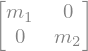

In [6]:
M = Matrix([[m1,0],[0,m2]])
M

### Matrix of Velocity Dependent Forces

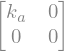

In [7]:
P = Matrix([[ka,0],[0,0]])
P

### Matrix of Velocity Dependent Forces

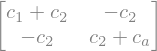

In [8]:
Q = Matrix([[c1 + c2,-c2],[-c2,ca + c2]])
Q

### Matrix associated with constraint DOF Velocity

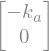

In [9]:
P_star = Matrix([[-ka],[0]])
P_star

### Matrix associated with constraint DOF Position

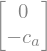

In [10]:
Q_star = Matrix([[0],[-ca]])
Q_star

### Excitation Vector (External Excitation)

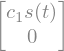

In [11]:
h = Matrix([[c1*s],[0]])
h

### Equation of Motion

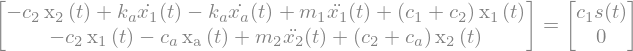

In [14]:
eom = Eq(M*q_dd + P*q_d + Q*q + P_star*xa_d + Q_star*xa, h)
eom

## Force Equilibrium Condition

In [19]:
forceEq = Eq(ca*(xa - x2) + ka*(xa_d - x1_d),delP*A)
forceEq

### Important Matrices from the Equilibrium Condition

In [33]:
P_dash = Matrix([[-ka,0]])
Q_dash = Matrix([[0,-ca]])
P_stardash = Matrix([ka])
Q_stardash = Matrix([ca])
h_dash = Matrix([delP*A])
fEq = Eq(P_dash*q_d + Q_dash*q + P_stardash*z_d + Q_stardash*z, h_dash) # To verify the matrices
fEq

## State Space Representation

### State Vector

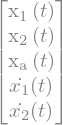

In [34]:
w = Matrix([[q],[z],[q_d]])
w

### State Velocity Vector

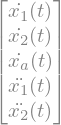

In [35]:
w_d = Matrix([[q_d],[z_d],[q_dd]])
w_d

### System Matrix

In [46]:
# Shape of Generalised coordinate vector (#DOF)
f = q.shape[0]
# Number of constraint DOFs
m = z.shape[0]

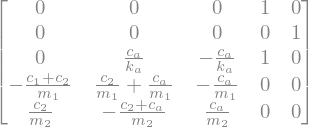

In [45]:
A = Matrix([[zeros(f),zeros(f,m),eye(f)],[-(P_stardash**-1)*Q_dash,-(P_stardash**-1)*Q_stardash,-(P_stardash**-1)*P_dash],[-(M**-1)*Q + (M**-1)*P_star*(P_stardash**-1)*Q_dash,(M**-1)*P_star*(P_stardash**-1)*Q_stardash - (M**-1)*Q_star,-(M**-1)*P + (M**-1)*P_star*(P_stardash**-1)*P_dash]])
A

### Excitation Vector (State Equation)

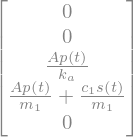

In [47]:
b = Matrix([[zeros(f,1)],[(P_stardash**-1)*h_dash],[(M**-1)*h - (M**-1)*P_star*(P_stardash**-1)*h_dash]])
b

### Final State Space Equation

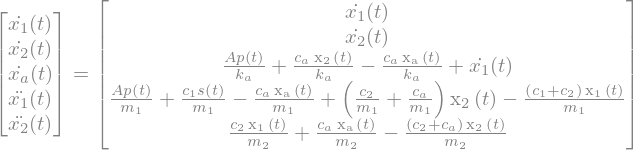

In [48]:
SSR = Eq(w_d,A*w + b)
SSR